In [1]:
 import numpy as np
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
from pyliso import plotTF, plotTFs
figlist = []
#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'lines.linewidth': 2.0}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9'] #5
lsList = ['-','--','-.',':']  #4

In [2]:
data = np.loadtxt('VacCanTempInLoop_19-08-2019_142233.txt')

In [3]:
np.shape(data)

(4108512, 2)

In [4]:
redData = np.zeros((np.shape(data)[0]//9600,2))
for ii in range((np.shape(data)[0]//9600)):
    redData[ii,0] = data[ii*9600,0]
    redData[ii,1] = np.mean(data[ii*9600:(ii+1)*9600,1])

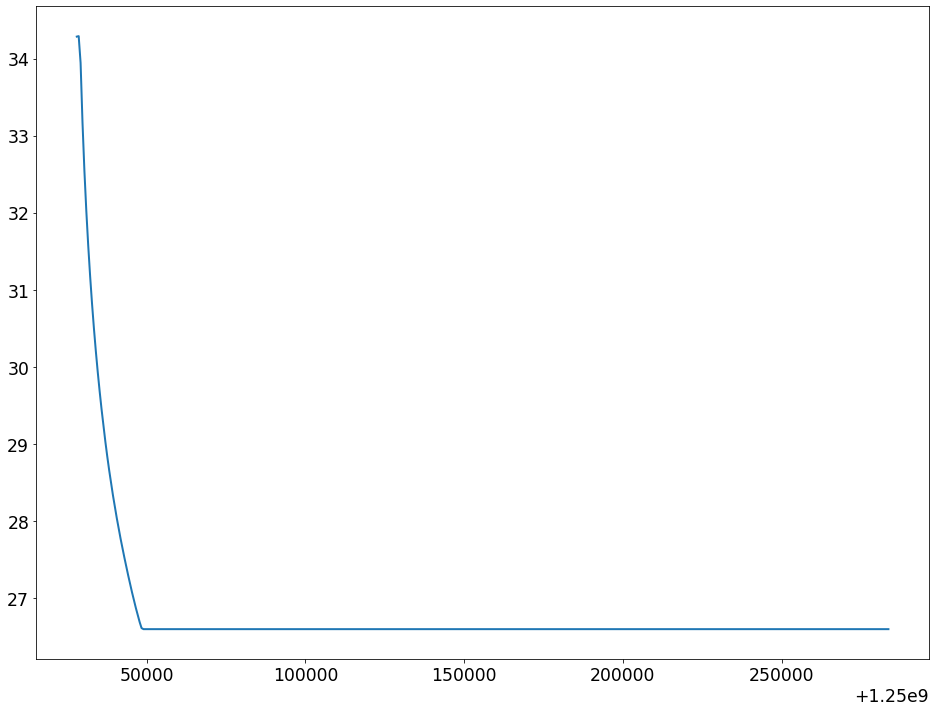

In [5]:
fig = plt.figure(figsize=[16,12])
plt.plot(redData[:,0],redData[:,1])

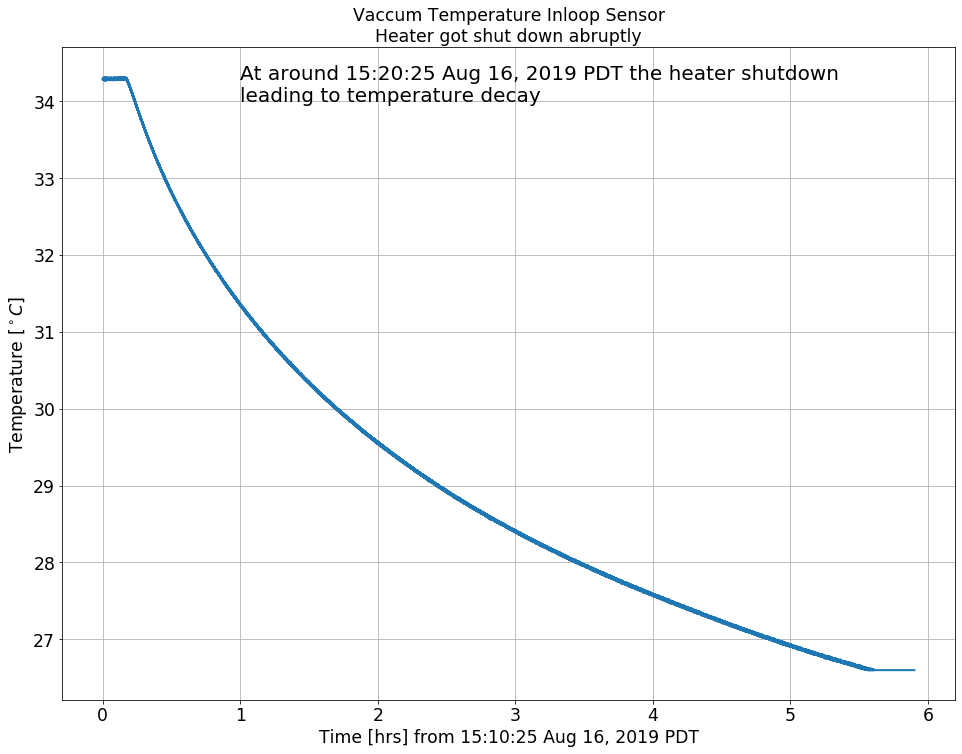

In [6]:
fig = plt.figure(figsize=[16,12])
ts = data[10000:350000,0] - data[10000,0]
plt.plot(ts/3600,data[10000:350000,1])
ax = fig.gca()
ax.set_title('Vaccum Temperature Inloop Sensor\nHeater got shut down abruptly')
ax.set_xlabel('Time [hrs] from 15:10:25 Aug 16, 2019 PDT')
ax.set_ylabel(r'Temperature [$^\circ C$]')
ax.text(1,34,'At around 15:20:25 Aug 16, 2019 PDT the heater shutdown\nleading to temperature decay',fontsize=20)
ax.grid()
figlist += [fig]

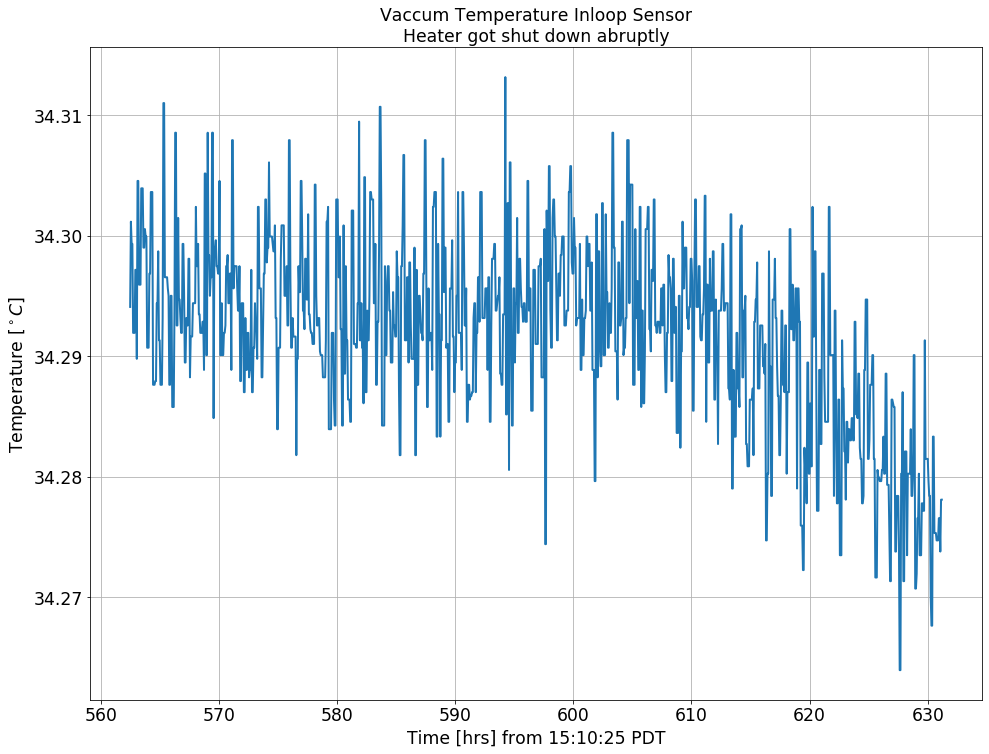

In [7]:
fig2 = plt.figure(figsize=[16,12])
ts = data[19000:20100,0] - data[10000,0]
plt.plot(ts,data[19000:20100,1])
ax = fig2.gca()
ax.set_title('Vaccum Temperature Inloop Sensor\nHeater got shut down abruptly')
ax.set_xlabel('Time [hrs] from 15:10:25 PDT')
ax.set_ylabel(r'Temperature [$^\circ C$]')
ax.grid()

In [8]:
data[19610,0]

1250029243.625

In [9]:
pp = PdfPages('VacCanInloopTemp.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()